# Understanding Descriptive Statistics

Import the necessary libraries here:

In [23]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
def roll_die(times):
    
    return np.random.choice(range(1,7), times)

n = 10

df = pd.DataFrame({'roll': [a+1 for a in range(n)], 'result': roll_die(n)})
df.set_index('roll')

,result
roll,
1,2
2,3
3,2
4,1
5,1
6,3
7,5
8,5
9,2


#### 2.- Plot the results sorted by value.

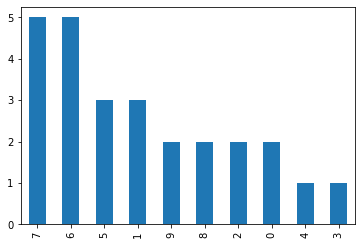

In [3]:
# your code here
df['result'].sort_values(ascending=False).plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

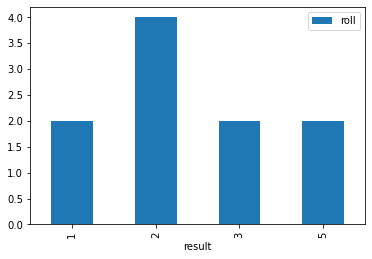

In [4]:
# your code here
df.groupby('result').count().plot(kind='bar')

In [5]:
"""
your comments here

while ploting all the results the attention is put 
onto the outcome of each one of them,
instead of focusing on how many times an outcome occurs

"""

'\nyour comments here\n\nwhile ploting all the results the attention is put \nonto the outcome of each one of them,\ninstead of focusing on how many times an outcome occurs\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here
def mean(series: pd.Series):
    
    return series.sum()/len(series)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
def frequency_dist_mean(series: pd.Series):
    freq = series.groupby(series[:]).count()
    
    return freq.sum()/len(freq)

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [8]:
# your code here
def median(series: pd.Series):
    series = series.sort_values()
    if len(series) % 2 == 0: 
        pos1 = series[len(series)//2] 
        pos2 = series[len(series)//2 - 1] 
        median = (pos1 + pos2)/2
    else: 
        median = series[len(series)//2] 
    return median

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [9]:
# your code here
def quartiles(series):
    series = series.sort_values()
    
    n = len(series)
    
    q1, q2, q3 = (median(series)+series.min())/2, median(series), (median(series)+series.max())/2
    
    return  q1, q2, q3

In [10]:
g = pd.Series([1, 3, 5, 7, 9, 10])
quartiles(g)

(3.5, 6.0, 8.0)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

No handles with labels found to put in legend.


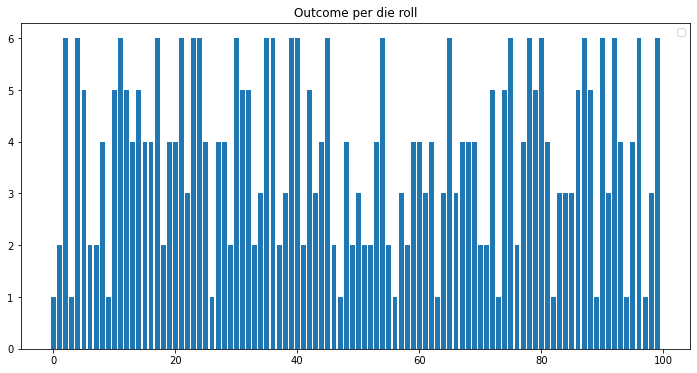

In [11]:
# your code here
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')
dice = dice.sort_values(by='value', ascending=False)
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(dice['roll'], dice['value'])
ax.set_title('Outcome per die roll')
ax.legend()

In [12]:
"""
your comments here
"""
dice.groupby('value').agg(frequency=('value', 'count'))

,frequency
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here
mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


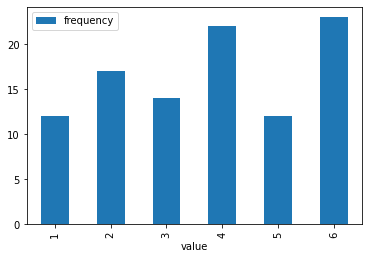

In [14]:
# your code here
dice.groupby('value').agg(frequency=('value', 'count')).plot(kind='bar')

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

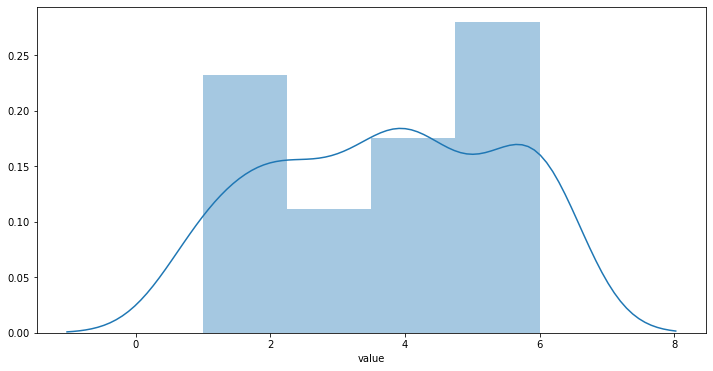

In [24]:
# your code here
fig, ax = plt.subplots(1,figsize=(12,6))
sns.distplot(dice['value'])
plt.show()

In [25]:
"""
peak of trendline and its mean match the same value
"""

'\npeak of trendline and its mean match the same value\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

(0.0, 300.0)

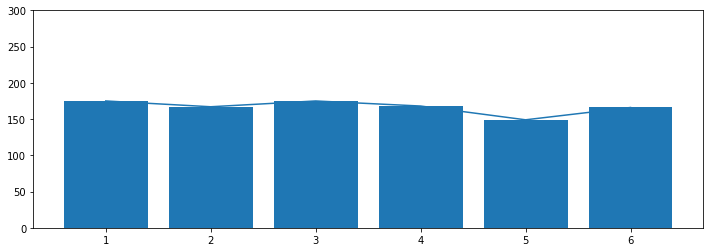

In [46]:
# your code here
dice1k = pd.read_csv('../data/roll_the_dice_thousand.csv')
group = dice1k.groupby('value').agg(count=('value', 'count')).reset_index()

fig, ax = plt.subplots(figsize=(12,4))
ax.bar(group['value'], group['count'])
ax.plot(group['value'], group['count'])
plt.ylim(top=300)

In [36]:
"""
your comments here

All outcomes occur pretty much the same amount of times. Meaning representative sample
"""

,count
value,
1,175
2,167
3,175
4,168
5,149
6,166


## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

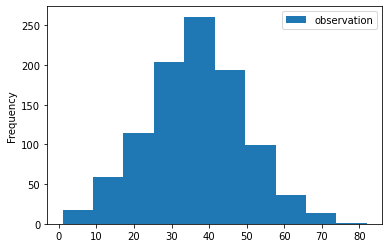

In [49]:
# your code here
ages = pd.read_csv('../data/ages_population.csv')
ages.plot(kind='hist')

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [62]:
# your code here
ages_mean = mean(ages['observation'])
ages_std = ages['observation'].std()

print(ages_mean, ages_std)

36.56 12.81649962597677


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

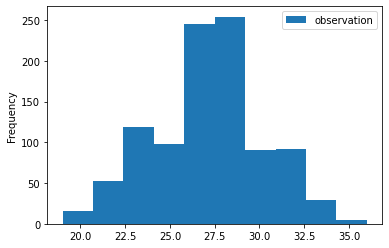

In [52]:
# your code here
ages2 = pd.read_csv('../data/ages_population2.csv')
ages2.plot(kind='hist')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [54]:
"""
your comments here
"""

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [63]:
# your code here
print(f'Mean and Stdev of Ages2 are respectively \n {mean(ages2["observation"])} and {ages2["observation"].std()} \n while previous same statistics are \n {ages_mean} and {ages_std} ') 

Mean and Stdev of Ages2 are respectively 
 27.155 and 2.9698139326891835 
 while previous same statistics are 
 36.56 and 12.81649962597677 


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

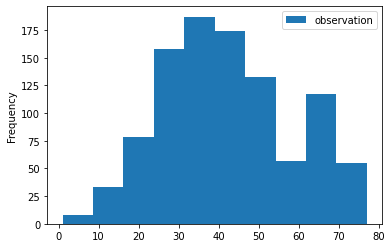

In [64]:
# your code here
ages3 = pd.read_csv('../data/ages_population3.csv')
ages3.plot(kind='hist')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [69]:
# your code here
print(f"{mean(ages['observation'])} and {ages3['observation'].std()}")

36.56 and 16.14470595986593


In [ ]:
"""
your comments here

Same mean but a bit higher std

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [88]:
[value for value in quartiles(ages3['observation'])]

[19.75, 38.5, 57.75]

(array([ 72., 392., 338.]),
 array([ 0.  , 19.75, 38.5 , 57.75]),
 <a list of 3 Patch objects>)

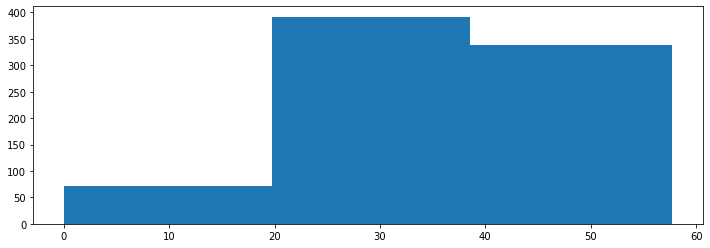

In [91]:
# your code here
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(ages3['observation'], bins=[0, 19.75, 38.5, 57.75,])

In [92]:
"""
your comments here

the gross of the population is between 20-40 years old
"""

'\nyour comments here\n\nthe gross of the population is between 20-40 years old\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

(array([  8.,  33.,  78., 158., 187., 174., 133.,  57., 117.,  55.]),
 array([ 1. ,  8.6, 16.2, 23.8, 31.4, 39. , 46.6, 54.2, 61.8, 69.4, 77. ]),
 <a list of 10 Patch objects>)

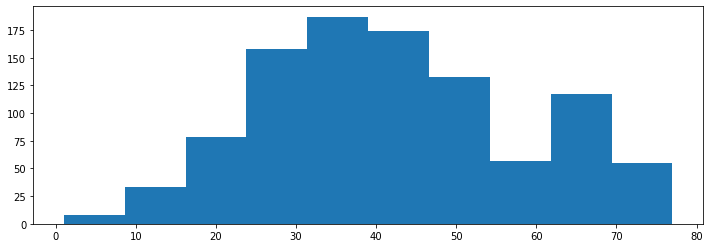

In [93]:
# your code here
fig, ax = plt.subplots(figsize=(12,4))
ax.hist(ages3['observation'], bins=10)

In [ ]:
"""
your comments here
10 bins for 10 decades can provide with a deeper ditribution analysis of the population
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""